# Coursera_ML Course2_Week3

مباحث بایاس و واریانس به همراه انتخاب مدل که اول این هفته بحث میشه رو تو نوت بوک تو کولب نوشتم که گویا ذخیره نشده

## ML development process

اول بایستی معماری مدل ( شامل دیتا، نوع مدل و غیره) مشخص بشه. بعد مدل ترین میشه  و بعد ارزیابی میکنیم. بایاس و واریانس و ارور و اینا رو چک میکنیم و در صورت لزوم معماری مدل رو تغییر میدیم. معمولا این حلقه بایستی چندین مرتبه تکرار بشه

برای اینکه بفهمیم مدل مون در چه وضعیه و چجوری میشه بهبودش داد، بعد بایاس و واریانس بحث آنالیز خطا میتونه خیلی کمک کننده باشه

آنالیز خطا اینجوریه که مثلا 500 تا دیتای کراس ولیدیشن داریم. الگوریتم مون 100 تا رو اشتباه دسته بندی کرده. میاییم این دیتاهایی که اشتباه براشون رخ داده رو بررسی میکنیم که چرا   . این اتفاق رخ داده. سعی میکنیم خطاهارو دسته بندی کنیم که با حل یک مشکل تمام اون دسته حل بشن یک نکته هم هست اینکخ این کار برای تسک هایی که انسان ها توش خوبن جواب میده مثل تشخیص ایمیل تبلیغاتی. ولی مثلا برای پیش بینی رفتار یک شخص مثل کلیک کردن روی تبلیغ خاص خیلی کمک کننده نیست و سخته

در مورد اضافه کردن دیتا هم بحث آنالیز ارور مهمه. معمولا جمع آوری دیتای بیشتر هزینه بر هست. بهتره که در زمینه دیتاهایی که تو ارور آنالیز باهاشون مشکل پیدا کردیم دیتای بیشتری جمع آوری بشه. یک راه جایگزین هم اینه که با همون دیتاهایی که داریم دیتاهای جدید بسازیم. مثلا در زمینه تشخیص نوشته ها، یک تصویر که مشخصه چه حرفی هست رو بچرخونیم، بزرگ یا کوچیک کنیم. این کار به ما تصاویر جدیدی میده که همون حرف قبلی هستند ما به همون دیتایی که داشتیم دیتای جدید ساختیم. یک راه دیگه هم اینه که خودمون دیتا تولید کنیمو مثلا برای کار تشخیص نوشته ها رز روی تصاویر میتونیم با فونت های مختلف متن بنویسیم و در شرایط مختلف ازشون عکس بگیریم. با این دیتا مدل رو ترین کنیم.

  بعضی موقع ها هم پیش میاد که تحت هیچ شرایطی نمیشه دیتای جدید حاصل کرد میتونیم از دیتاهای مشابه بیاریم تو کار خودمون استفاده کنیم 

Transfer learning: using data from a different task

مثلا یک الگوریتم دسته بندی اعداد دست نویس داریم ولی دیتای کافی برای ترین نداریم. یک مدل توسعه داده شده که یک میلیون عکس رو بررسی کرده و تو هزار تا دسته بندی مشخص کرده عکس چی هست. مثلا تو 5 تا لایه این کار رو رده. میتونیم از پارامتر هایی که این مدل پیدا کرده استفاده کنیم. البته لایه آخری این هزار تا نورون داره ولی مال ما ده تا هست. پارامترهای لایه آخر رو باید خودمون بدست بیاریم. یک راه دیگه هم اینه که نیاییم کلا از این پارامترها استفاده کنیم بلکه این پرامترها رو به عنوان مقادیر اولیه برای پارامترهای مدل خودمون بذاریم و مدل رو ترین کنیم (بسته به سایز دیتاست خودمون داره ) این کار رو بهش میگن supervised pretraining and then find tuning

# Week 3: Lab

In [23]:
import numpy as np

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [13]:
# train test split:
# Generate some data
X = [0, 2.88, 5.76, 8.65, 11.53, 14.41, 17.29, 20.18, 23.06, 25.94, 28.82, 31.71, 34.59, 37.47, 40.35, 43.24, 46.12, 49.];
y = [0, 5.55, 34.39, 71.39, 125.52, 183.03, 237.25, 441.08, 457.14, 563.11, 901.24, 1025.77, 890.33, 1417.39, 1268.67, 2242.65, 2653.83, 2391.31];
x_ideal= [0, 2.88, 5.76, 8.65, 11.53, 14.41, 17.29, 20.18, 23.06, 25.94, 28.82, 31.71, 34.59, 37.47, 40.35, 43.24, 46.12, 49.]
y_ideal= [0, 8.31, 33.23, 74.77, 132.93, 207.7, 299.09, 407.09, 531.71, 672.94, 830.8, 1005.26, 1196.35, 1404.04, 1628.36, 1869.29, 2126.84, 2401.]
print("X.shape", len(X), "y.shape", len(y))

#split the data using sklearn routine 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=1) # we used 1/3 of the data for the test which is 6 out of 18
print("X_train.shape", len(X_train), "y_train.shape", len(y_train))
print("X_test.shape", len(X_test), "y_test.shape", len(y_test))

X.shape 18 y.shape 18
X_train.shape 12 y_train.shape 12
X_test.shape 6 y_test.shape 6


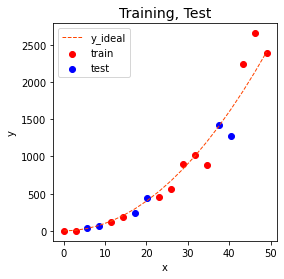

In [17]:
# دیتای ترین و دیتای تست رندوم هستند و یک رفتار دارند
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(x_ideal, y_ideal, "--", color = "orangered", label="y_ideal", lw=1)
ax.set_title("Training, Test",fontsize = 14)
ax.set_xlabel("x")
ax.set_ylabel("y")

ax.scatter(X_train, y_train, color = "red",    label="train")
ax.scatter(X_test, y_test,   color = "blue",   label="test")
ax.legend(loc='upper left')
plt.show()

<a name="2.2"></a>
### 2.2 Error calculation for model evaluation, linear regression
When *evaluating* a linear regression model, you average the squared error difference of the predicted values and the target values.

$$ J_\text{test}(\mathbf{w},b) = 
            \frac{1}{2m_\text{test}}\sum_{i=0}^{m_\text{test}-1} ( f_{\mathbf{w},b}(\mathbf{x}^{(i)}_\text{test}) - y^{(i)}_\text{test} )^2 
            \tag{1}
$$

در ادامه چند تا مدل که تو این لب ساختم رو کدش رو میذارم

### Exercise 3
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation
* Dense layer with 40 units, relu activation
* Dense layer with 6 units and a linear activation (not softmax)  
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [28]:
tf.random.set_seed(1234)
model = Sequential(
    [
        ### START CODE HERE ### 
  Dense(units=120, activation='relu'),
  Dense(units=40, activation='relu'),
  Dense(units=6, activation='linear'),
        ### END CODE HERE ### 

    ], name="Complex"
)
model.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### END CODE HERE ### 
)

### Exercise 5

Reconstruct your complex model, but this time include regularization.
Below, compose a three-layer model:
* Dense layer with 120 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 40 units, relu activation, `kernel_regularizer=tf.keras.regularizers.l2(0.1)`
* Dense layer with 6 units and a linear activation. 
Compile using
* loss with `SparseCategoricalCrossentropy`, remember to use  `from_logits=True`
* Adam optimizer with learning rate of 0.01.

In [29]:
tf.random.set_seed(1234)
model_r = Sequential(
    [
        ### START CODE HERE ### 
        Dense(units=120, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=40, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
        Dense(units=6, activation='linear'),
        ### START CODE HERE ### 
    ], name= None
)
model_r.compile(
    ### START CODE HERE ### 
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    ### START CODE HERE ### 
)